## Nirvana Lyrics Analysis

Source: 
https://www.kaggle.com/datasets/darkrubiks/nirvana-lyrics/data

Assumes csv is in the same folder as the notebook

In [3]:
%%capture

import pandas as pd
from nltk.corpus import stopwords
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

In [4]:
# read the raw data into a dataframe
df = pd.read_csv('raw_data.csv')
df.lyrics = df.lyrics.apply(eval)
df.lyrics = df.lyrics.apply(lambda x: ' '.join(x))

# replace "Ain't" with "Aint"
df.lyrics = df.lyrics.str.replace("Ain't", "Aint")

# replace "I'm left back" with "I'm left black"
df.lyrics = df.lyrics.str.replace("I'm left back", "I'm left black")

# tokenize the lyrics
df['tokens'] = df['lyrics'].apply(word_tokenize)
df.head()

,title,lyrics,tokens
0,About a Girl,"I need an easy friend I do, with an ear to len...","[I, need, an, easy, friend, I, do, ,, with, an..."
1,Aero Zeppelin,What's the season of love if you can't have ev...,"[What, 's, the, season, of, love, if, you, ca,..."
2,Ain't It A Shame,Aint it a shame to go fishin on a Sunday Aint ...,"[Aint, it, a, shame, to, go, fishin, on, a, Su..."
3,Alcohol (High On The Hog),My baby taught me how to live My baby taught m...,"[My, baby, taught, me, how, to, live, My, baby..."
4,All Apologies,What else should I be? All apologies What else...,"[What, else, should, I, be, ?, All, apologies,..."


Remove stop-words, common contractions, punctuation, leading apostrophes and uncommon punctuation.

In [5]:
stop_words = set(stopwords.words('english'))

custom_removals = ["n't", "'m", "'s", "'re", "'ve", "'ll", "'d", '--', "...", "..", "''", "``"]

# Remove stop words from each tokenized lyric
df['filtered_tokens'] = df['tokens'].apply(lambda tokens: \
                                           [word.lower() for word in tokens
                                            if word.lower() not in stop_words and
                                            word.lower() not in string.punctuation and
                                            word.lower() not in custom_removals])

# remove any leading apostrophes from the words
df['filtered_tokens'] = df['filtered_tokens'].apply(lambda tokens: \
                                                     [word[1:] if word[0] == "'" else word for word in tokens])

df.head()

,title,lyrics,tokens,filtered_tokens
0,About a Girl,"I need an easy friend I do, with an ear to len...","[I, need, an, easy, friend, I, do, ,, with, an...","[need, easy, friend, ear, lend, think, fit, sh..."
1,Aero Zeppelin,What's the season of love if you can't have ev...,"[What, 's, the, season, of, love, if, you, ca,...","[season, love, ca, everything, reason, love, l..."
2,Ain't It A Shame,Aint it a shame to go fishin on a Sunday Aint ...,"[Aint, it, a, shame, to, go, fishin, on, a, Su...","[aint, shame, go, fishin, sunday, aint, shame,..."
3,Alcohol (High On The Hog),My baby taught me how to live My baby taught m...,"[My, baby, taught, me, how, to, live, My, baby...","[baby, taught, live, baby, taught, baby, taugh..."
4,All Apologies,What else should I be? All apologies What else...,"[What, else, should, I, be, ?, All, apologies,...","[else, apologies, else, could, say, everyone, ..."


Question posed was: "How many times did Nirvana sing the word 'black'?"

In [6]:
search_word = 'black'

# get the songs that contain the word black
songs = df.filtered_tokens.apply(lambda tokens: search_word in tokens)
df[songs]

,title,lyrics,tokens,filtered_tokens
14,Big Cheese,Big Cheese Make me Mine says Go to the office ...,"[Big, Cheese, Make, me, Mine, says, Go, to, th...","[big, cheese, make, mine, says, go, office, bi..."
30,Do you Love Me,You really like my limousine You like the way ...,"[You, really, like, my, limousine, You, like, ...","[really, like, limousine, like, way, wheels, r..."
45,Heart-Shaped Box,She eyes me like a Pisces when I am weak I've ...,"[She, eyes, me, like, a, Pisces, when, I, am, ...","[eyes, like, pisces, weak, locked, inside, hea..."
86,On A Plain,I'll start this off without any words I got so...,"[I, 'll, start, this, off, without, any, words...","[start, without, words, got, high, scratched, ..."
89,Paper Cuts,When I'm feeling tired She pushed food through...,"[When, I, 'm, feeling, tired, She, pushed, foo...","[feeling, tired, pushed, food, door, crawl, to..."
105,Seasons In The Sun,"Goodbye, my friend, it's hard to die When all ...","[Goodbye, ,, my, friend, ,, it, 's, hard, to, ...","[goodbye, friend, hard, die, birds, singing, s..."
128,The Priest They Called Him,"""Fight tuberculosis, folks."" Christmas Eve, an...","[``, Fight, tuberculosis, ,, folks, ., '', Chr...","[fight, tuberculosis, folks, christmas, eve, o..."


Create a table showing only the title and the frequency of that word in the title

In [7]:
# produce a count of the appearance of the word black in each song that contains that word
df['frequency'] = df.filtered_tokens.apply(lambda tokens: tokens.count(search_word))
print(f"Songs containing the word {search_word} and the number of occurrences in that song")
df_result = df[songs][['title','frequency']].set_index('title').sort_values('frequency', ascending=False)
df_result

Songs containing the word black and the number of occurrences in that song


,frequency
title,
Big Cheese,8
Heart-Shaped Box,3
The Priest They Called Him,3
Do you Love Me,1
On A Plain,1
Paper Cuts,1
Seasons In The Sun,1


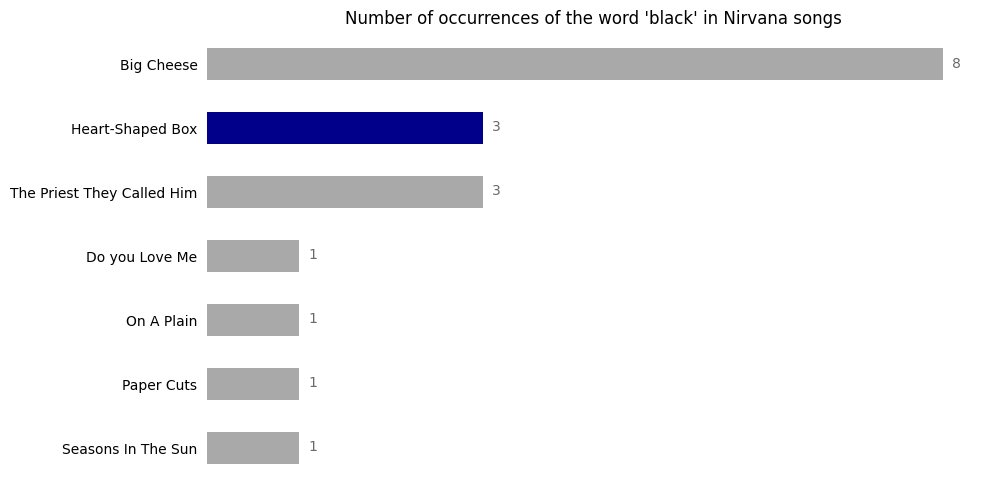

In [8]:
# produce a horizontal bar chart of df_result, sorted by count descending
import matplotlib.pyplot as plt
df_result.plot(kind='barh', figsize=(10, 5))
plt.title(f"Number of occurrences of the word '{search_word}' in Nirvana songs")
plt.ylabel("")

ax = plt.gca()
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.legend().set_visible(False)
for i in ax.patches:
    ax.text(i.get_width()+.1, i.get_y()+0.3, str(round(i.get_width(), 2)), fontsize=10, color='dimgrey')

ax.tick_params(axis='y', which='both', left=False)
plt.tight_layout()

# color the bars light-grey except 'Heart-Shaped Box', which should be dark blue
colors = ['darkgrey' if title != 'Heart-Shaped Box' else 'darkblue' for title in df_result.index]
for patch, color in zip(ax.patches, colors):
    patch.set_facecolor(color)